In [1]:
library(Seurat)
library(cowplot)
library(scran)

Loading required package: ggplot2
Loading required package: cowplot

Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave

Loading required package: Matrix
Loading required package: BiocParallel
Loading required package: SingleCellExperiment
Loading required package: SummarizedExperiment
Loading required package: GenomicRanges
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:Matrix’:

    colMeans, colSums, rowMeans, rowSums, which

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

  

In [2]:
data1_path = './pairwise/t4k.csv'
data2_path = './pairwise/pbmc4k.csv'

In [3]:
setwd("/Users/dariapodorskaja/Bachelor_thesis")


In [4]:
data1 <- read.table('./pairwise/t4k.csv',sep=",", nrows=700)
data2 <- read.table('./pairwise/pbmc4k.csv',sep=",", nrows=700)

In [5]:
raw.all <- cbind(data1, data2)

In [6]:
first.batch <- rep(c(TRUE, FALSE), c(ncol(data1), ncol(data2)))

In [7]:
# Making a plotting function.
plotFUN <- function(fname, Y, subset=NULL, ..., xlab="tSNE 1",ylab="tSNE 2",main="") {
  if (is.null(subset)) {
    subset <- seq_len(nrow(Y))
  }
  # png(fname,width=900,height=700)
  par(mfrow=c(1,1),mar=c(6,6,4,2),cex.axis=2,cex.main=3,cex.lab=2.5)
  plot(Y[,1], Y[,2], cex=0.1,
       pch=ifelse(first.batch, 21, 1)[subset], 
       col=ifelse(first.batch, "black", "red")[subset],
       bg="white", xlab=xlab, ylab=ylab, main=main) 
    # dev.off()
}

In [8]:
batchcolor=c("black","yellow")
plotFUNb <- function(fname, Y, subset=NULL, ...) {
  if (is.null(subset)) {
    subset <- seq_len(nrow(Y))
  }
  png(fname,width=900,height=700)
  par(mfrow=c(1,1),mar=c(6,6,4,2),cex.axis=2,cex.main=3,cex.lab=2.5)
  plot(Y[,1], Y[,2], cex=2,
       pch=ifelse(first.batch, 21, 1)[subset], 
       col=ifelse(first.batch, "black", "yellow")[subset],
       bg="white")#,  xlab="tSNE 1",ylab="tSNE 2")
  dev.off()
    }

In [9]:
t.unc <- t(raw.all)


In [10]:
require(Rtsne)


Loading required package: Rtsne


In [11]:
set.seed(0)

In [12]:
all.dists.unc <- as.matrix(dist(t.unc))

In [13]:
tsne.unc <- Rtsne(all.dists.unc, is_distance=TRUE, perplexity = 10)

In [14]:
pca <- prcomp(t(all.dists.unc))

In [22]:
pca1 <- prcomp(t(raw.all))

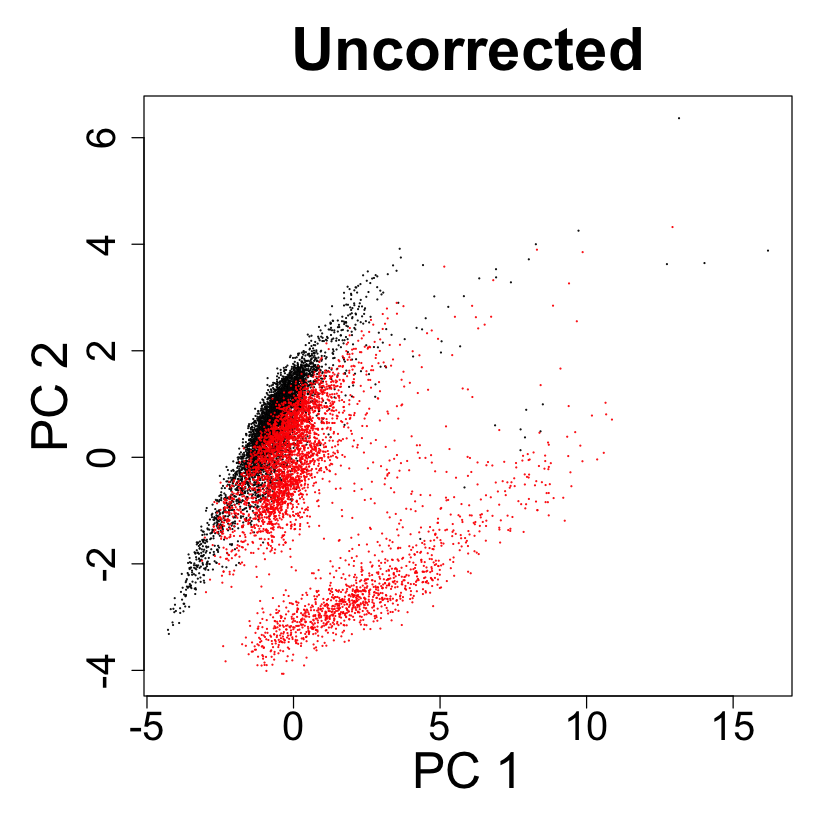

In [25]:
#plot raw data 
plotFUN("results/uncFA.png", pca1$x, main="Uncorrected",  xlab="PC 1",ylab="PC 2")

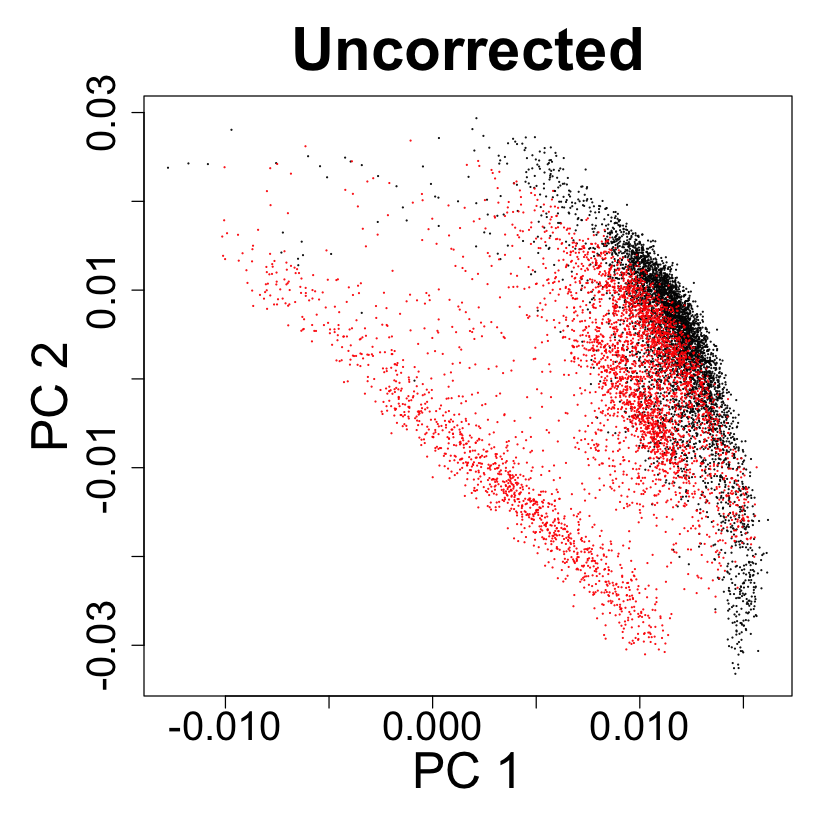

In [15]:
# plot he matrix of variable loadings 
#(i.e., a matrix whose columns contain the eigenvectors). The function princomp returns this in the element loadings.
plotFUN("results/uncFA.png", pca$rotation, main="Uncorrected",  xlab="PC 1",ylab="PC 2")

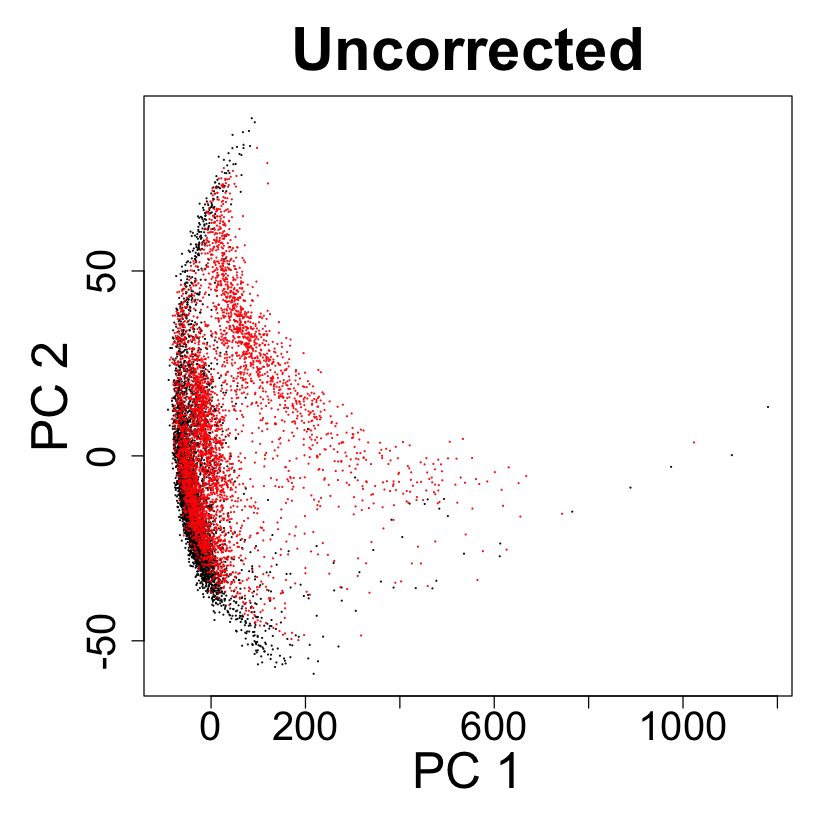

In [27]:
# a numeric or complex matrix (or data frame) which provides the data for the principal components analysis.
plotFUN("results/uncFA.png", pca$x, main="Uncorrected",  xlab="PC 1",ylab="PC 2")

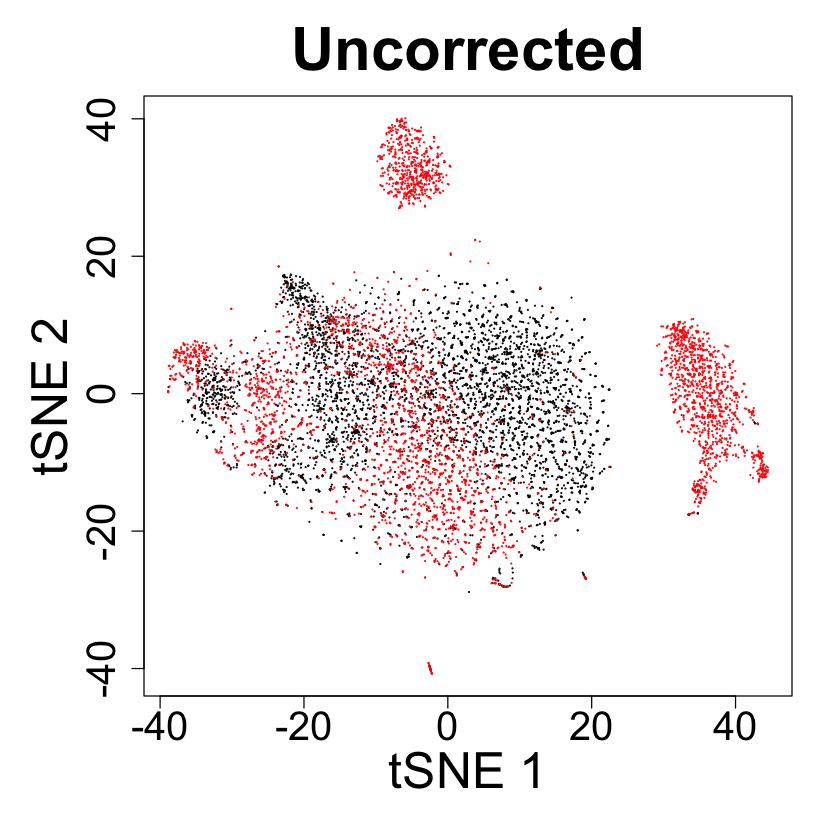

In [28]:
plotFUN("results/uncFA.png", tsne.unc$Y, main="Uncorrected",  xlab="tSNE 1",ylab="tSNE 2")

# Corrected plot

In [32]:
data <- lapply(c(data1_path, data2_path),function(fname){
    X = read.csv(fname,header=F,as.is=T, nrows=700)
})

In [36]:
mnn.out <- mnnCorrect(as.matrix(data[[1]]), as.matrix(data[[2]]), 
                          k=20, sigma=0.1,cos.norm.in=TRUE, cos.norm.out=TRUE, var.adj=TRUE,compute.angle=TRUE) 
# corrected values

In [37]:
X.mnn <- cbind(mnn.out$corrected[[1]], mnn.out$corrected[[2]])
t.mnn <- t(X.mnn)

In [56]:
pca_mnn <- prcomp(t(mnn.out$corrected[[2]]))

In [58]:
head(mnn.out$corrected[[2]])

0.0004187983,0.0006228527,0.0006232697,0.0006538681,0.042447258,0.008022174,-2.531988e-05,0.018622646,0.0004129498,2.520432e-05,⋯,0.0008623639,0.0339927926,0.0001481174,0.0376922282,0.009816838,0.027571390,-0.0003094544,0.0243370947,0.0005260633,0.039659462
-0.0151770027,0.0607780674,-0.0196775119,-0.0033459888,-0.002588885,-0.003122940,3.239491e-02,0.032497416,-0.0036614920,7.516708e-03,⋯,-0.0150774595,0.0305693281,-0.0053727509,0.0542097333,-0.002912583,0.026678270,0.0584878580,-0.0044227629,-0.0039941514,0.024609618
-0.0093835790,-0.0089790438,-0.0135527792,-0.0013520370,-0.001574407,-0.001369765,-9.280848e-03,-0.009533790,-0.0017115150,-1.197017e-02,⋯,-0.0110934279,-0.0012694821,-0.0019019164,0.0362311526,-0.001749995,0.014750539,0.0396300715,0.0001286733,-0.0016602890,0.030580209
0.0869363920,0.0448722218,0.0072633233,0.0037566805,0.004647377,0.039318523,3.246274e-03,0.044793158,0.0054809578,4.538442e-02,⋯,0.0067908946,0.0037216707,0.0107295132,0.0394727180,0.005734545,0.076885926,0.0851030613,0.0329887748,0.0058283398,0.048171425
-0.0062957805,-0.0057607541,-0.0089954173,-0.0016242533,-0.001549397,-0.001315823,4.022602e-02,-0.006140874,-0.0020096848,-7.709063e-03,⋯,-0.0067931157,-0.0012473464,-0.0017870417,-0.0013865125,-0.002203447,-0.008074104,0.0378701760,0.0230713692,0.0388304466,-0.005613260
0.0509335677,0.0012376369,0.0025465614,0.0451025367,0.041823367,0.031062064,7.303216e-02,0.033046334,0.0004886467,1.363110e-03,⋯,0.0015903532,0.0002977665,0.0028681165,-0.0005713353,0.000298093,0.001473009,-0.0005612115,0.0008287384,0.0003641400,0.001097097


In [53]:
head(mnn.out$corrected[[1]])

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V4529,V4530,V4531,V4532,V4533,V4534,V4535,V4536,V4537,V4538
0.0000000,0.04104426,0,0.00000000,0.00000000,0.00000000,0.04754037,0.00000000,0.00000000,0.00000000,⋯,0.00000000,0,0.00000000,0,0,0.00000000,0.00000000,0,0.00000000,0.03417569
0.0000000,0.00000000,0,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,⋯,0.03985975,0,0.00000000,0,0,0.03356676,0.00000000,0,0.00000000,0.00000000
0.0415289,0.00000000,0,0.03890929,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,⋯,0.00000000,0,0.00000000,0,0,0.00000000,0.00000000,0,0.00000000,0.00000000
0.0000000,0.04104426,0,0.00000000,0.00000000,0.04127247,0.00000000,0.03460982,0.03877849,0.00000000,⋯,0.07971949,0,0.00000000,0,0,0.08676881,0.04006254,0,0.05652653,0.00000000
0.0000000,0.00000000,0,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.03877849,0.00000000,⋯,0.03985975,0,0.09787889,0,0,0.00000000,0.00000000,0,0.00000000,0.00000000
0.0000000,0.00000000,0,0.03890929,0.04238835,0.00000000,0.00000000,0.00000000,0.06146246,0.04065825,⋯,0.03985975,0,0.00000000,0,0,0.08676881,0.00000000,0,0.00000000,0.00000000


Warning message in title(...):
“conversion failure on 'Сorrected' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in title(...):
“conversion failure on 'Сorrected' in 'mbcsToSbcs': dot substituted for <a1>”

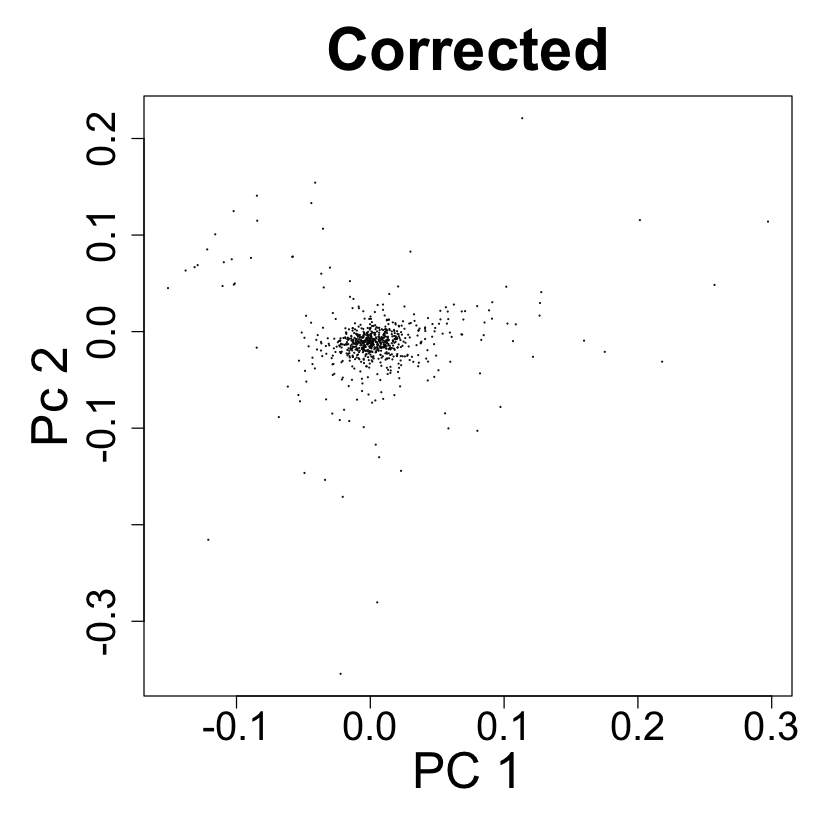

In [57]:
plotFUN("results/uncFA.png", pca_mnn$rotation, main="Сorrected",  xlab="PC 1",ylab="Pc 2")

In [40]:
# Generating a t-SNE plot.
set.seed(0)
all.dists.mnn <- as.matrix(dist(t.mnn))

In [48]:
tsne.mnn <- Rtsne(all.dists.mnn, is_distance=TRUE, perplexity = 30, initial_dims = 50)

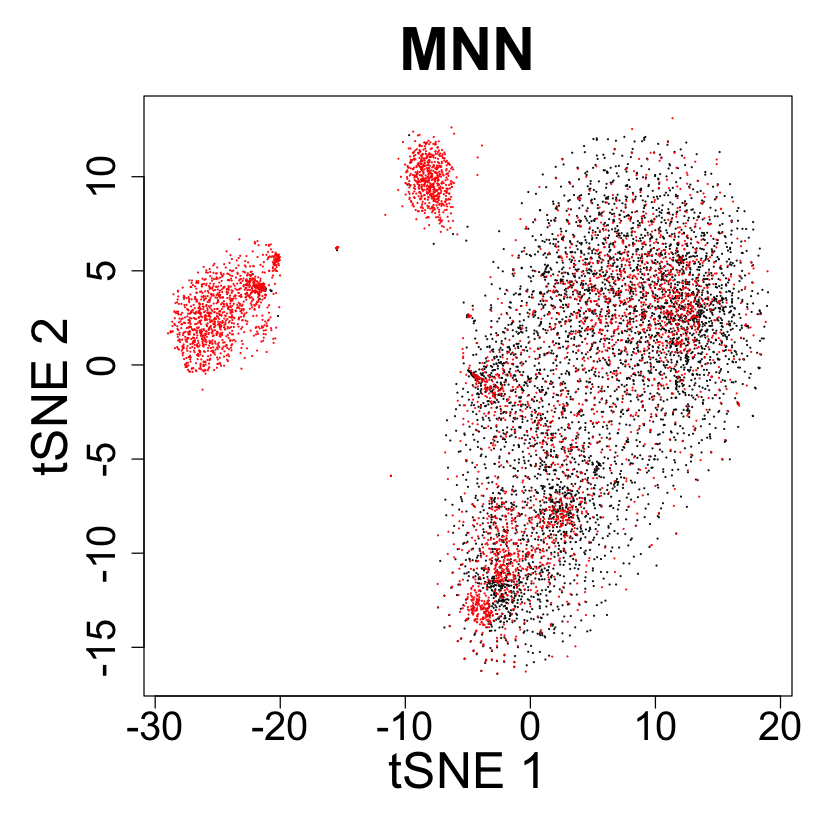

In [49]:
plotFUN("results/mnnFA.png", tsne.mnn$Y, main="MNN",  xlab="tSNE 1",ylab="tSNE 2")

In [43]:
tsne.mnn1 <- Rtsne(all.dists.mnn, is_distance=TRUE, perplexity = 90, reduction.use="pca", dims.use = 1:75)

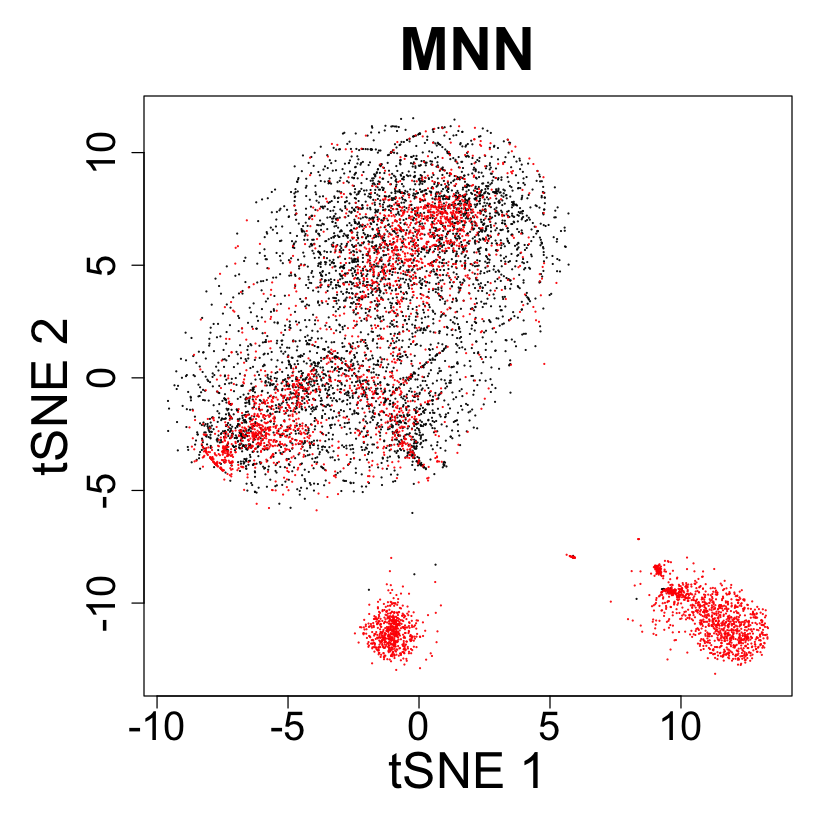

In [44]:
plotFUN("results/mnnFA.png", tsne.mnn1$Y, main="MNN",  xlab="tSNE 1",ylab="tSNE 2")

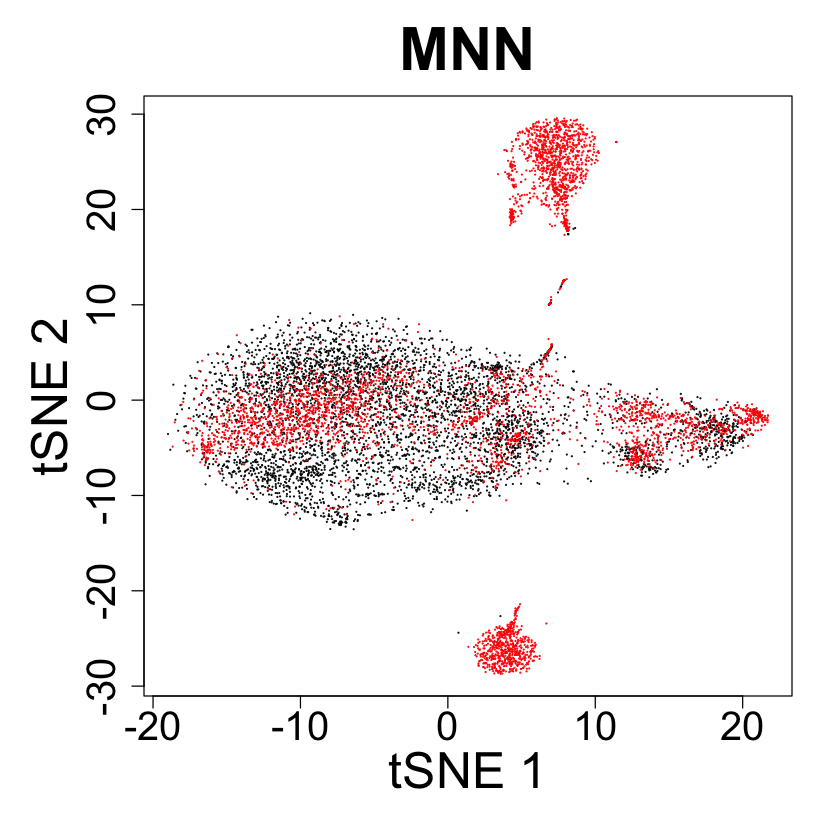

In [45]:
set.seed(0)
tsne.mnn2 <- Rtsne(t.mnn, perplexity = 90, check_duplicates = FALSE)
plotFUN("results/mnnFA_conventsne.png", tsne.mnn2$Y, main="MNN",  xlab="tSNE 1",ylab="tSNE 2")